In [15]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from tqdm import tqdm

## Data

In [2]:
df = pd.read_csv("/Users/tunglee/Desktop/Fubon-CNN/data/2330_Stock.csv", encoding='utf-8', index_col=0)

In [3]:
df.set_index('mdate', inplace=True)
df = df['close_d']
df

mdate
1994-09-05     96.0
1994-09-06    102.5
1994-09-07    109.5
1994-09-08    117.0
1994-09-09    125.0
              ...  
2022-07-04    440.0
2022-07-05    446.0
2022-07-06    435.5
2022-07-07    457.5
2022-07-08    467.0
Name: close_d, Length: 7071, dtype: float64

## Config

In [12]:
"""
BASEDATE: 初始時間
DURATION; 經過時間
TRAINPATH: 訓練集資料夾路徑
VAILDPATH: 測試集資料夾路徑
"""
BASEDATE = datetime.strptime('20210706', '%Y%m%d')
DURATION = BASEDATE + relativedelta(days=30)
TRAINPATH = "imgs/train/"
VAILDPATH = "imgs/val/"

## Plot

In [5]:
data = df[str(BASEDATE.date()): str(DURATION.date())]

<AxesSubplot:xlabel='mdate'>

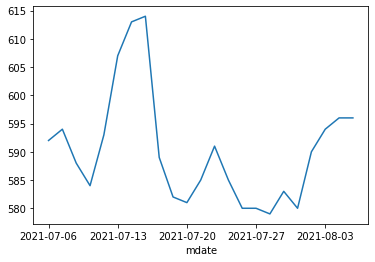

In [6]:
data.plot()

# Augmentation 資料擴增 
創造類似的趨勢
- random.gauss(mu=0, sigma=img_M.std())

In [7]:
import random

In [8]:
"""
資料增量
param:
data: pd.DataFrame 要增量的時間序列資料
weight: 變形的程度
"""
def augmentation(data, weight=3):
    nums = []
    for i in range(len(data)):
        x = random.gauss(mu=0, sigma=data.std()/weight)
        nums.append(x)
    data_duplicated = data.copy()
    data_duplicated += nums
    return data_duplicated

In [9]:
"""
圖片儲存
param:
data: pd.DataFrame 要儲存的時間序列資料
path: 儲存路徑
name: 圖片名稱
"""
def saveImg(data, path, name):
    plt.xticks([])
    plt.yticks([])
    img = plt.plot(data)
    plt.savefig(path + name)
    plt.cla()

In [16]:
"""
創建資料集
param:
data: pd.DataFrame 要增量的時間序列資料
path: 儲存路徑
label: 圖片標記
nums: 要創建的圖片數量
"""
def createDataset(data, path, label, nums):
    savePath = path + str(label) + '/' 
    for i in tqdm(range(nums)):
        if label == 1:
            weight=random.uniform(2.5, 4)
            img = augmentation(data, weight)
        else:
            weight=random.uniform(0.3, 0.8)
            img = augmentation(data, weight)
        saveImg(img, savePath, f'{i}.png')
        

100%|██████████| 200/200 [00:14<00:00, 13.67it/s]


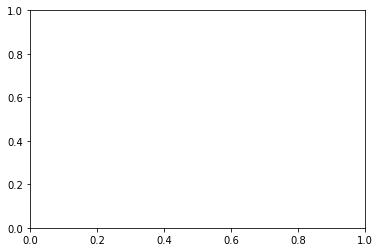

In [17]:
# 建立訓練資料集
createDataset(data, TRAINPATH, label=1, nums=200)
createDataset(data, VAILDPATH, label=1, nums=200)

100%|██████████| 50/50 [00:03<00:00, 12.61it/s]


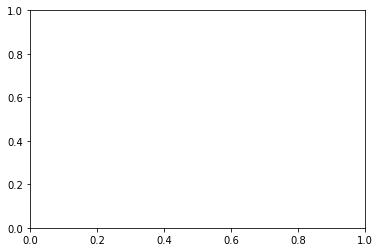

In [18]:
# 建立驗證資料集
createDataset(data, TRAINPATH, label=0, nums=50)
createDataset(data, VAILDPATH, label=0, nums=50)